# II. HÁZI FELADAT

Ezt a feladatsort tetszőleges programozási nyelven meg lehet oldani, de a forráskódot minden esetben mellékelni kell. A python és octave megoldások programkódja kerülhet a jupyter notebookba. A programok legyenek modulárisak, használjanak függvényeket! A kimeneti adatok ábrázolásához minden esetben használjuk a jupyter notebookot! Az ábrák legyenek áttekinthetőek, és szerepeljen rajtuk tengelyfelirat!

# Oszcillátorok numerikus vizsgálata

$$ \def\dd{{\textrm{d}}} $$

Oszcillátoroknak olyan dinamikai rendszereket nevezünk, melyek mozgása az idő periodikus vagy kvázi-periodikus függvényeként írható le. Az egydimenziós oszcillátor mozgásegyenlete

$$ m \frac{\dd^2x}{\dd t^2} = - \frac{\dd V(x)}{\dd x} $$

alakban írható. Egy szabad oszcillátor teljes energiája mindaddig megmarad, amíg a rendszerben nem hat súrlódási erő (csillapított oszcillátor), illetve nem hatunk rá külső erővel (gerjesztett oszcillátor). Az oszcillátor teljes energiája a kinetikus és a potenciális energia összege, azaz

$$ E_{\textrm{tot}} = \frac{m v^2}{2} + V(x)$$

## Harmonikus oszcillátor

Amennyiben a $V(x)$ potenciál négyzetes, abban az esetben harmonikus oszcillátorról beszélünk:

$$\begin{eqnarray}
    V(x) & = & \frac{1}{2}kx^2 \\
    m \frac{\dd^2x}{\dd t^2} & = & - k x.
\end{eqnarray}$$

A harmonikus oszcillátor mozgásegyenlete analitikusan is megoldható. A megoldás

$$ x(t) = A \cos( \omega t + \phi ) $$

alakú, ahol $A$ az amplitúdó - vagyis a legnagyobb kitérés -, $\omega$ a körfrekvencia és $\phi$ a kezdőfázis $t = 0$-ban. A harmonikus oszcillátor körfrekvenciáját a potenciálban szereplő $k$ állandó és az $m$ tömeg jellgű mennyiség határozza meg:

$$ \omega = \sqrt{\frac{k}{m}} = \frac{2\pi}{T}, $$

ahol $T$ a pediódusidő, melyből $f = 1/T$ módon kaphatjuk meg a frekvenciát.

## Anharmonikus oszcillátor

Az anharmonikus abban különböznek a harmonikus oszcillátortól, hogy a mozgásukat meghatározó potenciál nem négyzetes alakú. Néhány lehetséges anharmonikus potenciál:

* Negyedrendű potenciál

$$ V(x) = \frac{1}{4}kx^4 $$

* Lennard-Jones potenciál

$$ V(x) = V_0 \left[ \left( \frac{x_0}{x} \right)^{12} - 2 \left( \frac{x_0}{x} \right)^{6} \right] $$

## Csillapított és gerjesztett oszcillátor

A csillapított és/vagy gerjesztett oszcillátorok mozgásegyenletében megjelenik egy sebességtől függő és egy további, többnyire időfüggő külső erőtag is:

$$ m \frac{\dd^2x}{\dd t^2} = - \frac{\dd V(x)}{\dd x} - c \frac{\dd x}{\dd t} + F(t) $$

Csillapított és szinuszosan gerjesztett oszcillátorok viselkedése analitikusan is egyszerűen vizsgálható. Az alábbi feladatokban ezért ezektől eltérő rendszereket vizsgálunk numerikus módszerek segítségével.

# Feladatok

## 1. feladat

Számítsuk ki a fent felírt két anharmonikus potenciálhoz tartozó erőt.

[ megoldás helye ]

## A lineáris harmónikus oszcilátor

Az $m$ tömegű egydimenziós harmonikus oszcillátorra $ F = -kz$ erő hat, ahol $k$ egy pozitív állandó. Konzervatív erőtereknél az $erő$ előáll a potenciál negatív gradienseként.
$$ F_{(r)} = - grad V_{(r)} $$

Így ugyanezen analógia alapján számolom ki e két anharmonikus oszcillátorhoz tartozó erőket.
### Első
* Negyedrendű potenciál
$$ V(x) = \frac{1}{4}kx^4 $$
Amiből az $erő$ $$F_{(x)} = - kx^3 $$

### Második
* Lennard-Jones potenciál
$$ V(x) = V_0 \left[ \left( \frac{x_0}{x} \right)^{12} - 2 \left( \frac{x_0}{x} \right)^{6} \right] $$
Amiből az $erő$ 
$$ F(x) = 12V_0 \left[ \left( \frac{x_0^{6}}{x^{7}} \right) - \left ( \frac{x_0^{12}}{x^{13}} \right) \right] $$

# 2. feladat

Írjunk olyan függvényeket, melyek kiszámítják a harmonikus potenciált, az ehhez tartozó erőt, illetve az 1. feladatban felírt anharmonikus potenciálokat és erőket. Ábrázoljuk a potenciálokat és az erőket grafikonon!

In [1]:
%pylab inline 
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import RK45

Populating the interactive namespace from numpy and matplotlib


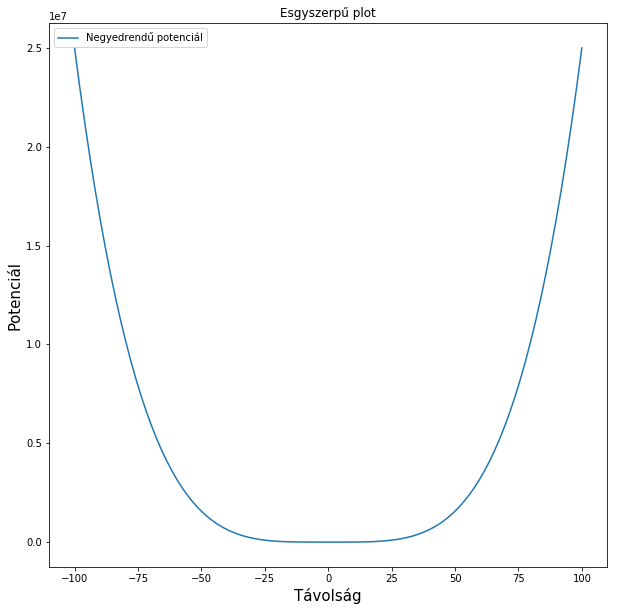

In [2]:
def negyedV(x):
        
    yV= (1/4)* x**4;
    figsize(10,10)
    xlabel('Távolság', fontsize = '15')
    ylabel('Potenciál', fontsize = '15')
    title('Esgyszerpű plot')
    plt.plot(x,yV, linestyle='-', label='Negyedrendű potenciál')
    legend(loc='upper left')
    
negyedV(linspace(-100,100,100))

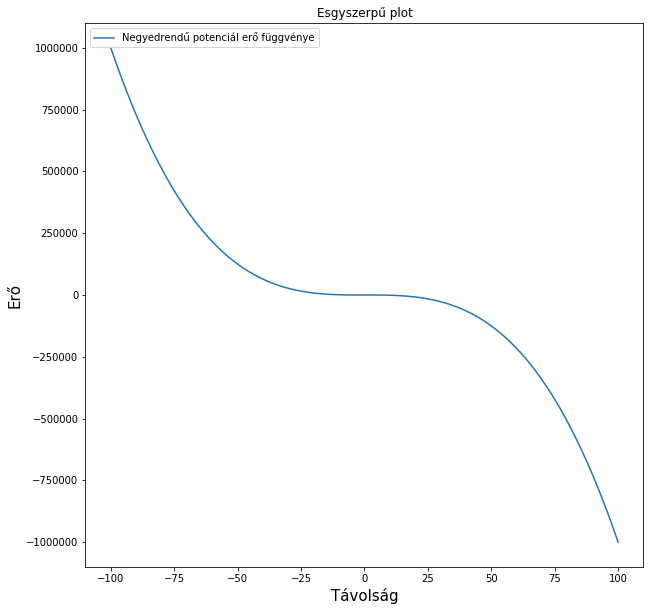

In [3]:
def negyedF(x):
    
    yF= - x**3;
    figsize(10,10)
    xlabel('Távolság', fontsize = '15')
    ylabel('Erő', fontsize = '15')
    title('Esgyszerpű plot')
    plt.plot(x,yF, linestyle='-', label='Negyedrendű potenciál erő függvénye')
    legend(loc='upper left')
    
negyedF(linspace(-100,100,100))

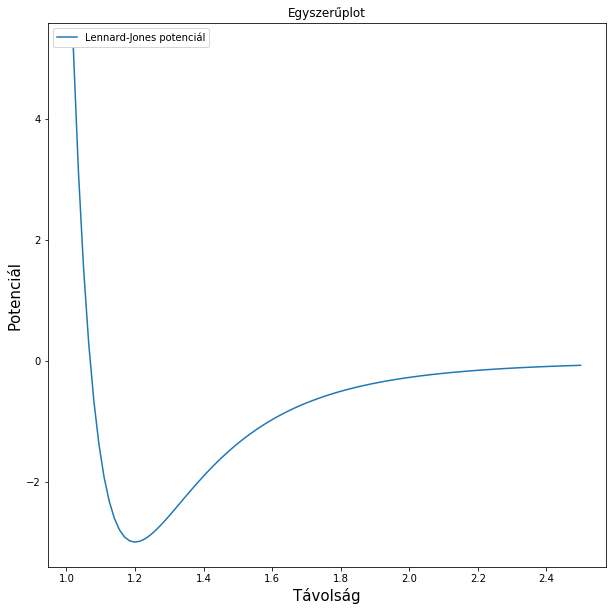

In [10]:
def lenjoV(x,v0,x0):

    z=v0*(((x0/x)**12)-2*(x0/x)**6);
    figsize(10,10)
    xlabel('Távolság', fontsize = '15')
    ylabel('Potenciál', fontsize = '15')
    title('Egyszerűplot')
    plt.plot(x,z, marker='', linestyle='-', label='Lennard-Jones potenciál')
    legend(loc='upper left')
    
    
lenjoV(linspace(1.02,2.5,100),3,1.2)



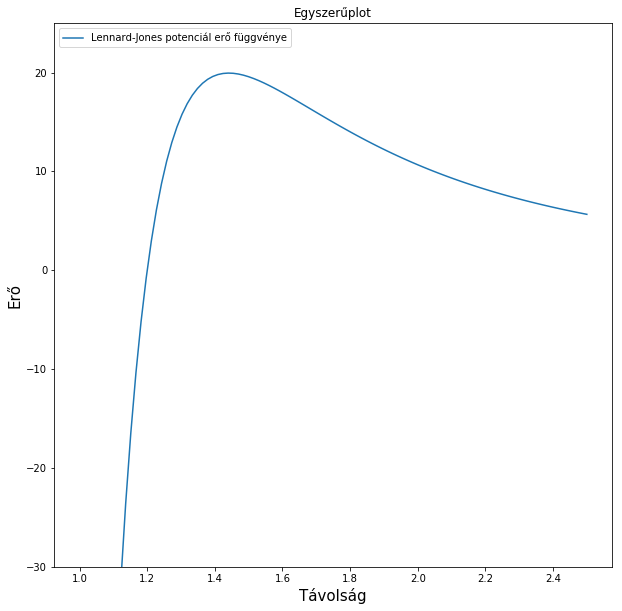

In [5]:
def lenjoF(x,v0,x0):

    z=12*v0*(((x0**5/x**3)-(x0**11/x**9)));
    figsize(10,10)
    xlabel('Távolság', fontsize = '15')
    ylabel('Erő', fontsize = '15')
    title('Egyszerűplot')
    plt.plot(x,z, marker='', linestyle='-', label='Lennard-Jones potenciál erő függvénye')
    legend(loc='upper left')
    ylim(-30,25)
lenjoF(linspace(1,2.5,100),3,1.2)

Rungekuttával
v = x pont
F/m = v pont
vektorként tárolod
Kell... Adott helyen aott időben meg kell kapni a változók numerikus értékét

## 3. feladat

Integráljuk a harmonikus és Lennard-Jones-potenciállal meghatározott oszcillátorok mozgásegyenletét egyszerű negyed rendű Runge-Kutta-módszerrel vagy a Dormand-Prince-féle 5(4)-ed rendű, adaptív lépéshossz-választásos módszerrel. Az integráláshoz használjunk szabadon elérhető programcsomagot, pl.:

* python: scipy.integrate.RK45
* octave: ode45
* C: GSL ODE csomag
* C++: Boost.Numeric.Odeint csomag

Ábrázoljuk az egyenlet változóinak időfejlődését, a teljes energiát és a lépéshosszt az idő függvényében!

## Harmónikus rezgőmozgás problémája

Természetesen az $$F = -Dr$$ alapesetből indulunk ki, ahol $F$ az erő, $D$ az ugynevezett direkciós állandó ami egy rugóval jellenezhető esetben a rugót jellemző állandó, $r$ egy vektor, ami pedig a kitérés. Mechanika tanulmányainkból tudjuk, hogy a mozgásegyenlete ennek a problémának, $$m \ddot r = -Dr$$
Ez egyenlet felírása után be kell vezetnem a $${\omega}^2 = \frac {D}{m}$$ mennyiséget, ahol $\omega$ a körfrekvencia nevet viseli. A kör+ frekvenciával a következő alakra tudom hozni az egyenletemet, $$\ddot r + {\omega}^2 r = 0$$
Ez egy másodrendű, állandó együtthatójú, homogén közönséges differenciálegyenlet, melynek tudjuk, hogy két megoldása van.Ezen differenciálegyenlet megoldásával kapom meg a partikuláris, majd az álltalános megoldást, majd kezdeti feltételeket megadva eljutunk a keresett potenciálhoz amiből egy gradiensképzéssel megkapjuk az erőt, mivel a tér amiben dolgoztunk potenciálos.Esetünkben egy egydimenziós mozgést fogok modellezni amit a $$\ddot x + {\omega}^2 x = 0$$ egyenlet jellemez.
Amit a megoldáshoz egy elsőrendű diffegyenletre vezetünk vissza.
$$v = \dot x$$
$$ \frac{F}{m} = \dot v$$

[[1.         1.        ]
 [1.04791973 1.05826201]
 [1.19480959 1.36435664]
 [1.56763482 1.65492605]
 [2.18196056 1.72111326]
 [3.59445908 1.73133329]]


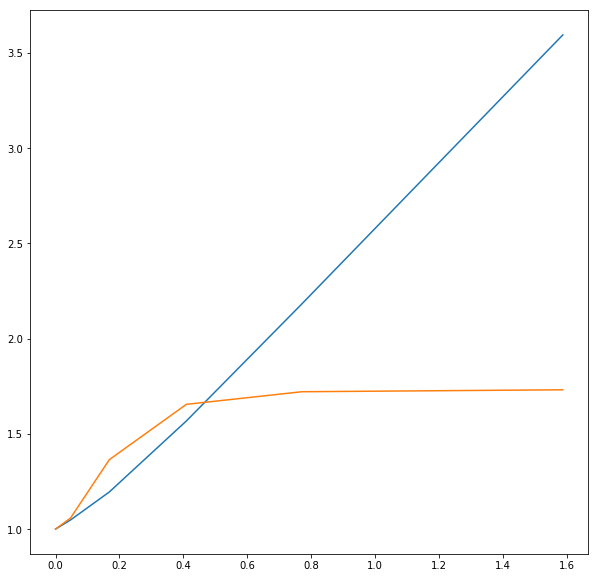

In [64]:
y_k = np.array([1,1])

def harm_oszc(t,y):
    m,x_k,v_k = 1, 1, 1;
    dx = y[1];
    dv = 12*v_k*(((x_k**6/(y[0])**7)-(x_k**12/(y[0])**13))/m);
    return dx, dv

rk = RK45(harm_oszc,0,y_k, np.inf);
t = np.zeros(6)
y = np.empty((np.shape(t)[0],rk.y.shape[0]))

for i in range(6):
    t[i] = rk.t
    for j in range(rk.y.shape[0]):
        y[i:,j]=rk.y[j]
    rk.step()

plot(t,y[:,0])
plot(t,y[:,1])

print(y)

#rk.step()
#rk.t
#rk.y

## 4. feladat

Interpoláljuk a 3. feladatból kapott megoldásokat időben egyenletes lépésközzel, lineárisan és köbös spline-ok segítségével!

In [ ]:
# megoldás helye

## 5. feladat

Számítsuk ki, és ábrázoljuk a felprogramozott oszcillátorok Fourier-spektrumát. Mit figyelhetünk meg?

In [ ]:
# megoldás helye

## 6. feladat

Programozzunk be kaotikus oszcillátort!$^1$ Egy szinuszosan gerjesztett oszcillátor esetében a kaotikus viselkedés feltétele, hogy a visszatérítő erő ne lineáris függvénye legyen a kitérésnek. Ábrázoljuk a kitérés és a sebesség időfüggését, valamint a teljesítményspektrumot! Futassuk az integrálást legalább 1 millió lépésig, és ábrázoljuk a rendszer Poincaré-metszetét, azaz a sebességet a kitérés függvényében az $\omega t = n \cdot 2 \pi, n = 1, 2, 3, ... $ feltétel mellett!

$^1$ http://sprott.physics.wisc.edu/pubs/paper265.pdf